## Задание 3

Дан датасет eplleaguetables.csv, в котором представлены все итоговые таблицы команд сезонов 2010/2011 - 2019/2020 Английской Премьер Лиги. С помощью наглядного графика продемонстрируйте, сколько очков необходимо набрать команде, чтобы гарантированно не вылететь напрямую в низший дивизион, основываясь только на информации о представленных в датасете сезонах. Вылетают напрямую команды, занявшие 19 и 20 места.

Описание датасета eplleaguetables.csv:
* Position - итоговое место команды в таблице сезона (от 1 до 20 места)
* Club - название клуба
* Matches - кол-во матчей, сыгранное командой в рамках сезона
* Wins - кол-во побед команды в рамках сезона
* Draws - кол-во ничьих команды
* Losses - кол-во поражений команды
* GoalsScored - кол-во забитых голов командой
* GoalsConceded - кол-во пропущенных голов командой
* GoalDiff - разница между забитыми и пропущенными голами
* Points - кол-во очков команды
* Season - идентификатор сезона (например, 10-11 обозначает сезон 2010/2011)

## Импорты и первичный анализ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv('eplleaguetables.csv')

In [2]:
df.info()
display(df.describe())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Position       200 non-null    int64 
 1   Club           200 non-null    object
 2   Matches        200 non-null    int64 
 3   Wins           200 non-null    int64 
 4   Draws          200 non-null    int64 
 5   Losses         200 non-null    int64 
 6   GoalsScored    200 non-null    int64 
 7   GoalsConceded  200 non-null    int64 
 8   GoalDiff       200 non-null    int64 
 9   Points         200 non-null    int64 
 10  Season         200 non-null    object
dtypes: int64(9), object(2)
memory usage: 17.3+ KB


,Position,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points
count,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.500000,38.0,14.320000,9.360000,14.320000,52.165000,52.165000,0.000000,52.320000
std,5.780751,0.0,6.150344,2.940003,5.610256,16.617112,12.814791,26.765499,17.438408
min,1.000000,38.0,3.000000,2.000000,1.000000,22.000000,22.000000,-54.000000,16.000000
25%,5.750000,38.0,10.000000,7.000000,10.000000,41.000000,43.000000,-20.000000,40.000000
50%,10.500000,38.0,12.000000,9.000000,15.000000,48.000000,52.000000,-7.000000,47.000000
75%,15.250000,38.0,19.000000,11.000000,19.000000,62.000000,60.000000,19.250000,64.250000
max,20.000000,38.0,32.000000,17.000000,28.000000,106.000000,85.000000,79.000000,100.000000


,Position,Club,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points,Season
0,1,Man Utd,38,23,11,4,78,37,41,80,10-11
1,2,Chelsea,38,21,8,9,69,33,36,71,10-11
2,3,Man City,38,21,8,9,60,33,27,71,10-11
3,4,Arsenal,38,19,11,8,72,43,29,68,10-11
4,5,Tottenham,38,16,14,8,55,46,9,62,10-11
5,6,Liverpool,38,17,7,14,59,44,15,58,10-11
6,7,Everton,38,13,15,10,51,45,6,54,10-11
7,8,Fulham,38,11,16,11,49,43,6,49,10-11
8,9,Aston Villa,38,12,12,14,48,59,-11,48,10-11
9,10,Sunderland,38,12,11,15,45,56,-11,47,10-11


In [15]:
positions = df['Position'].unique()
pos_points = None

for pos in positions:
    sub_df = df[df['Position'] == pos]
    points = np.array(sub_df['Points']) 
    points.sort()
    
    if pos_points is not None:
        pos_points = np.vstack([pos_points, points])
    else:
        pos_points = points

print(pos_points.shape, pos_points.min(axis=-1), pos_points.max(axis=-1), sep='\n')

(20, 10)
[80 71 66 66 62 58 54 46 46 44 44 42 40 38 38 37 35 33 26 16]
[100  97  82  79  75  69  64  60  54  54  52  49  46  46  43  42  40  39
  39  33]


## График

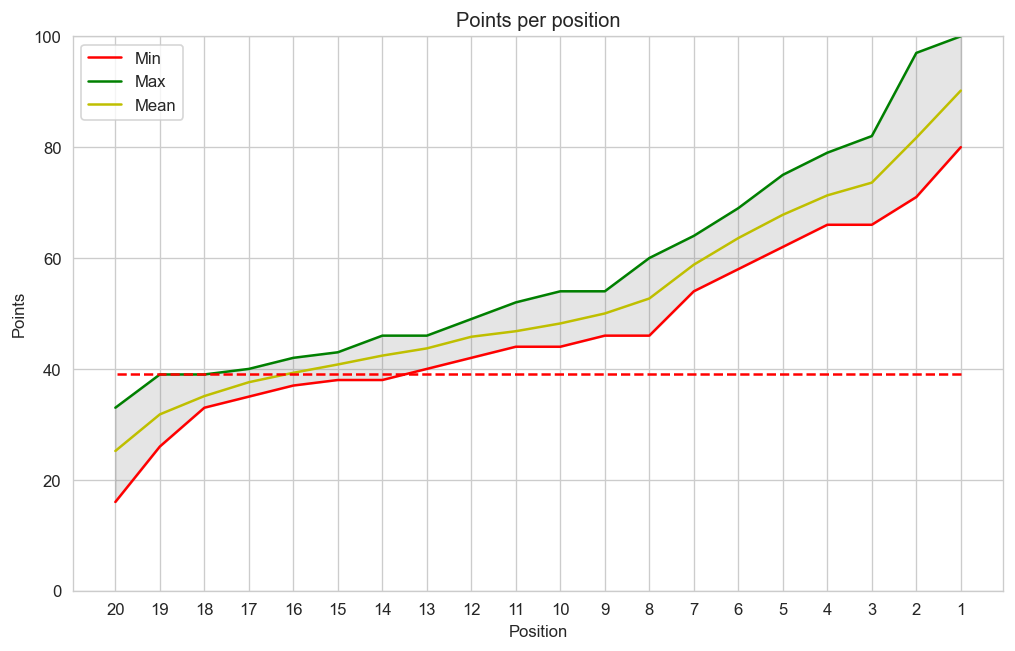

In [36]:
pos_min = pos_points.min(axis=-1)
pos_max = pos_points.max(axis=-1)
pos_mean = pos_points.mean(axis=-1)

fig = plt.figure(figsize = (10,6), dpi=120)

plt.plot(positions, pos_min, c='r', label='Min')
plt.plot(positions, pos_max, c='g', label='Max')
plt.plot(positions, pos_mean, c='y', label='Mean')

plt.fill_between(positions, pos_min, pos_max, color='gray', alpha=0.2)
plt.hlines(y=pos_max[18], xmin=1, xmax=20, linestyles='--', color='red')

plt.title("Points per position")
plt.xlabel("Position")
plt.ylabel("Points")
plt.legend()

plt.xticks(np.arange(1, 21, 1))
ax = plt.gca()
ax.set_ylim([0, 100])
ax.invert_xaxis()

# plt.tight_layout()
fig.savefig('res/3.png')
plt.show()

## Ответ

In [37]:
pos_max[18] + 1

40

Таким образом команде для того, чтобы не вылететь (занять 1-18 место), необходимо **набрать минимум 40 баллов**. На основании чемпионатов прошлых 10 лет